In [46]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import imageio.v3 as imageio
import numpy as np
from tensorflow import keras
import tensorflow.keras.layers as layers

# Lab24

## 3.
Pakeisti modelių hiperparametrus, optimizavimo funkcijas, tinklo architektūras, aktyvacijos funkcijas.

In [61]:
# train mnist

mnist = tf.keras.datasets.mnist
(train_images0, train_labels0), (test_images0, test_labels0) = mnist.load_data()

test_images  = test_images0.reshape(10000, 784)
train_images = train_images0.reshape(60000, 784)

test_images  = test_images/255.0
train_images = train_images/255.0

keras_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

keras_model.build(input_shape=[None,784])

keras_model.summary()

keras_model.compile(
  optimizer=tf.keras.optimizers.SGD(0.2),
  loss=tf.keras.losses.CategoricalHinge(),
  metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

# Train loop
history = keras_model.fit(
  train_images,
  train_labels0,
  batch_size=len(train_images),
  epochs=200,
  validation_data=(test_images, test_labels0),
)



Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 20)                15700     
                                                                 
 dense_42 (Dense)            (None, 10)                210       
                                                                 
Total params: 15910 (62.15 KB)
Trainable params: 15910 (62.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.1158 - sparse_categorical_accuracy: 0.1325 - val_loss: 0.1145 - val_sparse_categorical_accuracy: 0.1317
Epoch 2/200
1/1 [==============================] - 0s 99ms/step - loss: 0.1152 - sparse_categorical_accuracy: 0.1294 - val_loss: 0.1139 - val_sparse_categorical_accuracy: 0.1297
Epoch 3/200
1/1 [==============================] - 0s 105ms

Key: loss
Key: sparse_categorical_accuracy
Key: val_loss
Key: val_sparse_categorical_accuracy


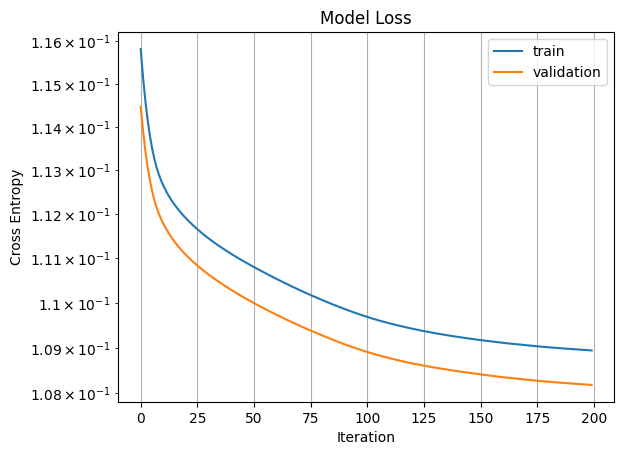

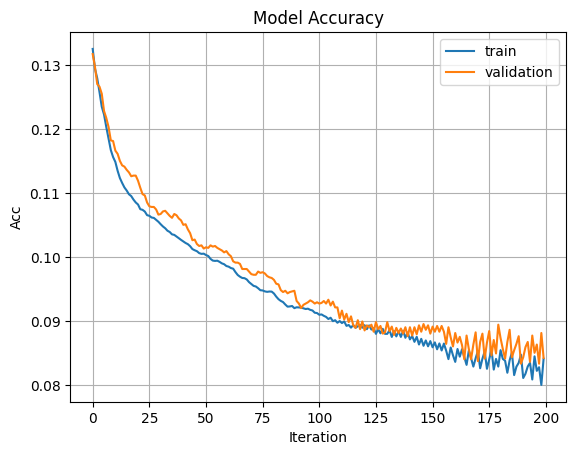

In [62]:
# vizualize mnist

for item in history.history:
    print("Key:",item)

plt.plot(history.history['loss'],label="train")
plt.plot(history.history['val_loss'],label="validation")
plt.title('Model Loss')
plt.yscale('log')
plt.ylabel('Cross Entropy')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()

#print("history",history.history)
plt.plot(history.history['sparse_categorical_accuracy'],label="train")
plt.plot(history.history['val_sparse_categorical_accuracy'],label="validation")
plt.title('Model Accuracy')
#plt.yscale('log')
plt.ylabel('Acc')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()

## 4.
Pamėginti MNIST duomenims gauti kuo didesnį tikslumą.

In [ ]:
# train mnist

mnist = tf.keras.datasets.mnist
(train_images0, train_labels0), (test_images0, test_labels0) = mnist.load_data()

test_images  = test_images0.reshape(10000, 784)
train_images = train_images0.reshape(60000, 784)

test_images  = test_images/255.0
train_images = train_images/255.0

keras_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation='softmax')
])

keras_model.build(input_shape=[None,784])

keras_model.summary()

keras_model.compile(
    optimizer=tf.keras.optimizers.SGD(0.4, use_ema=True),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

# Train loop
history = keras_model.fit(
    train_images,
    train_labels0,
    batch_size=len(train_images),
    epochs=300,
    validation_data=(test_images, test_labels0),
)


Key: loss
Key: sparse_categorical_accuracy
Key: val_loss
Key: val_sparse_categorical_accuracy


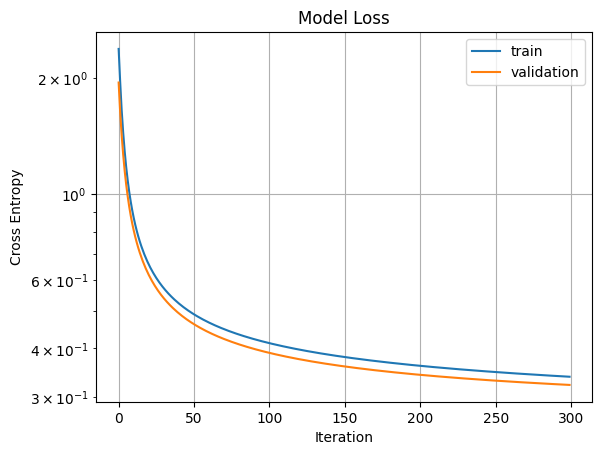

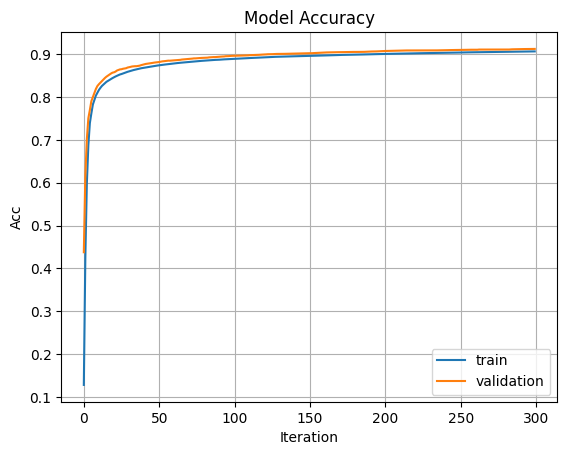

In [60]:
# vizualize mnist

for item in history.history:
    print("Key:",item)

plt.plot(history.history['loss'],label="train")
plt.plot(history.history['val_loss'],label="validation")
plt.title('Model Loss')
plt.yscale('log')
plt.ylabel('Cross Entropy')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()

#print("history",history.history)
plt.plot(history.history['sparse_categorical_accuracy'],label="train")
plt.plot(history.history['val_sparse_categorical_accuracy'],label="validation")
plt.title('Model Accuracy')
#plt.yscale('log')
plt.ylabel('Acc')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()

## 5.
Rasti internete duomenų rinkinį su vaizdais ir pritaikyti turimą kodą.

In [81]:
# load datasets

# https://www.kaggle.com/datasets/zalando-research/fashionmnist
train_dataset = pd.read_csv('assets/fashion-mnist_train.csv', skiprows = [0], header=None).values
train_input = train_dataset[:, 1:]
train_label = train_dataset[:, :1]

test_dataset = pd.read_csv('assets/fashion-mnist_test.csv', skiprows = [0], header=None).values
test_input = test_dataset[:, 1:]
test_label = test_dataset[:, :1]


In [88]:
k_l2=0
keras_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(20, activation='tanh',kernel_regularizer=keras.regularizers.l2(k_l2)),
    #tf.keras.layers.Dense(20, activation='tanh',kernel_regularizer=keras.regularizers.l2(k_l2)),
    tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=keras.regularizers.l2(k_l2))
])

keras_model.build(input_shape=[None, 784])
keras_model.summary()

keras_model.compile(
    optimizer=tf.keras.optimizers.Adam(), # Optimizer
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Loss function to minimize
    metrics=[keras.metrics.SparseCategoricalAccuracy()] # List of metrics to monitor
)

history = keras_model.fit(
    train_input,
    train_label,
    batch_size=len(train_input),
    epochs=300,
    validation_data=(test_input, test_label)
)


Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/300
1/1 [==============================] - 11s 11s/step - loss: 200.8899 - sparse_categorical_accuracy: 0.0993 - val_loss: 135.2529 - val_sparse_categorical_accuracy: 0.1143
Epoch 2/300
1/1 [==============================] - 0s 393ms/step - loss: 136.3396 - sparse_categorical_accuracy: 0.1098 - val_loss: 113.3213 - val_sparse_categorical_accuracy: 0.1422
Epoch 3/300
1/1 [==============================] - 0s 212ms/step - loss: 114.0896 - sparse_categorical_accuracy: 0.1405 - val_loss: 104.0747 - val_sparse_categorical_accuracy: 0.1805

Key: loss
Key: sparse_categorical_accuracy
Key: val_loss
Key: val_sparse_categorical_accuracy


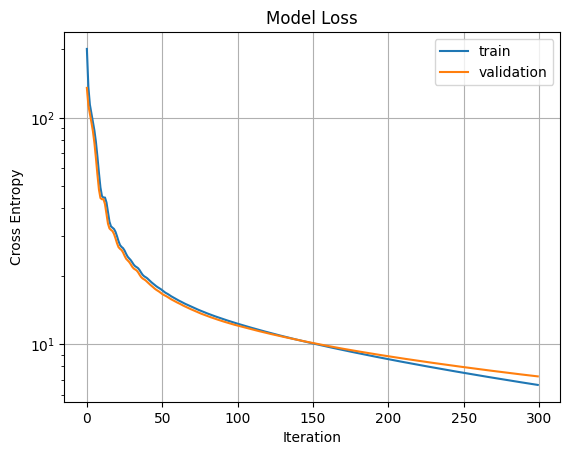

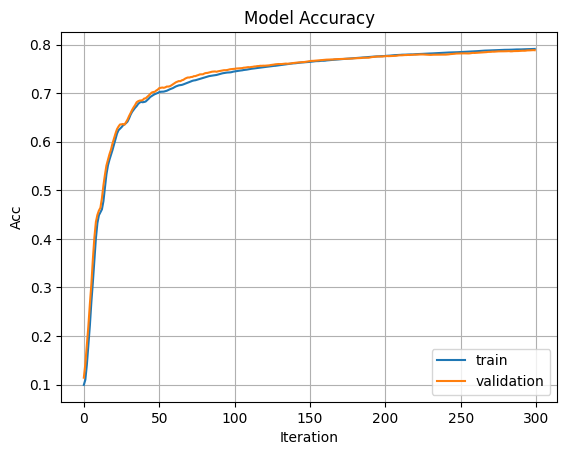

In [90]:
# vizualize

for item in history.history:
    print("Key:",item)

plt.plot(history.history['loss'],label="train")
plt.plot(history.history['val_loss'],label="validation")
plt.title('Model Loss')
plt.yscale('log')
plt.ylabel('Cross Entropy')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()

#print("history",history.history)
plt.plot(history.history['sparse_categorical_accuracy'],label="train")
plt.plot(history.history['val_sparse_categorical_accuracy'],label="validation")
plt.title('Model Accuracy')
#plt.yscale('log')
plt.ylabel('Acc')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()

# Lab31

## 2.

Adaptuokite Lab24 MNIST kodą pridedant konvoliucinius sluoksnius (MaxPooling2D, Conv2D, Flatten).

In [27]:
# train mnist

mnist = tf.keras.datasets.mnist
(train_images0, train_labels0), (test_images0, test_labels0) = mnist.load_data()

test_images  = test_images0.reshape(10000, 28, 28)
train_images = train_images0.reshape(60000, 28, 28)

test_images  = test_images/255.0
train_images = train_images/255.0

keras_model = tf.keras.models.Sequential([
  layers.Conv2D(8, (2, 2), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(16, (2, 2), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(10, activation='softmax')
])

keras_model.build(input_shape=[None,784])

keras_model.summary()

keras_model.compile(
  optimizer=tf.keras.optimizers.SGD(0.2),
  loss=tf.keras.losses.CategoricalHinge(),
  metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

# Train loop
history = keras_model.fit(
  train_images,
  train_labels0,
  batch_size=len(train_images),
  epochs=200,
  validation_data=(test_images, test_labels0),
)


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 27, 27, 8)         40        
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 13, 13, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 12, 12, 16)        528       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 6, 6, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_16 (Flatten)        (None, 576)               0         
                                                                 
 dense_31 (Dense)            (None, 10)              

KeyboardInterrupt: 

Key: loss
Key: sparse_categorical_accuracy
Key: val_loss
Key: val_sparse_categorical_accuracy


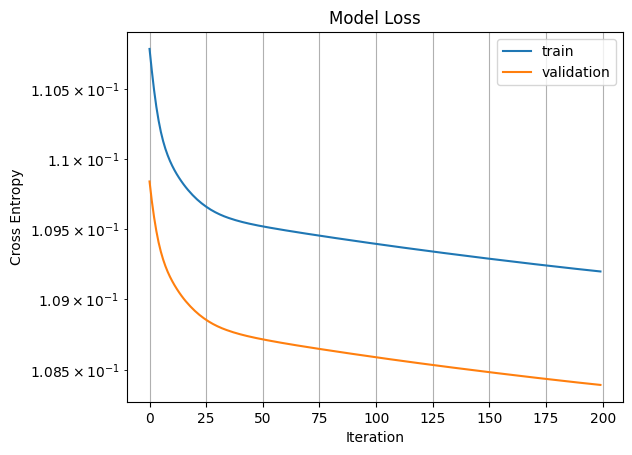

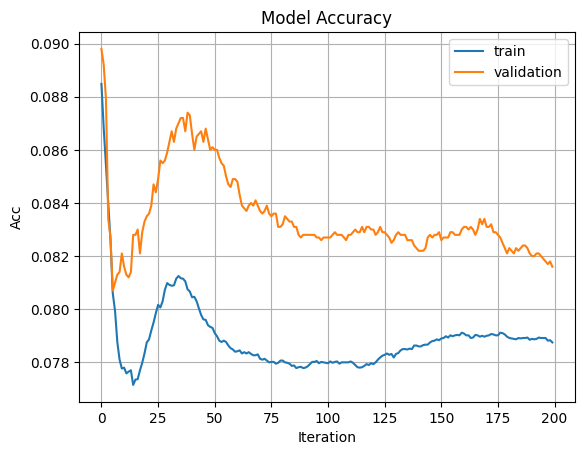

In [21]:
# vizualize mnist

for item in history.history:
    print("Key:",item)

plt.plot(history.history['loss'],label="train")
plt.plot(history.history['val_loss'],label="validation")
plt.title('Model Loss')
plt.yscale('log')
plt.ylabel('Cross Entropy')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()

#print("history",history.history)
plt.plot(history.history['sparse_categorical_accuracy'],label="train")
plt.plot(history.history['val_sparse_categorical_accuracy'],label="validation")
plt.title('Model Accuracy')
#plt.yscale('log')
plt.ylabel('Acc')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()

## 3.

Palyginkite savarankiškai adaptuotą kodą su Lab31.

Mano variantas yra daug lėtis ir blogesnis, su laiko mano tikslumas mažėja.

## 4.

Išmėginkite keletą tinklo architektūrų ir mokymosi parametrų.

In [60]:
mnist = tf.keras.datasets.mnist
(train_images0, train_labels0), (test_images0, test_labels0) = mnist.load_data()

test_images=test_images0
train_images=train_images0

test_images  = test_images/255.0
train_images = train_images/255.0

keras_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Dropout(.6, input_shape=(2,)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.Dropout(.6, input_shape=(2,)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.Dropout(.6, input_shape=(2,)),
    tf.keras.layers.MaxPooling2D((2, 2)),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

keras_model.build(input_shape=[None,784])

keras_model.summary()

keras_model.compile(
    optimizer=tf.keras.optimizers.SGD(0.02),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

# Train loop
history = keras_model.fit(
    train_images,
    train_labels0,
    batch_size=100,
    epochs=20,
    validation_data=(test_images, test_labels0),
)


Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_77 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 dropout_42 (Dropout)        (None, 26, 26, 28)        0         
                                                                 
 max_pooling2d_52 (MaxPooli  (None, 13, 13, 28)        0         
 ng2D)                                                           
                                                                 
 conv2d_78 (Conv2D)          (None, 11, 11, 32)        8096      
                                                                 
 dropout_43 (Dropout)        (None, 11, 11, 32)        0         
                                                                 
 max_pooling2d_53 (MaxPooli  (None, 5, 5, 32)          0         
 ng2D)                                               

Key: loss
Key: sparse_categorical_accuracy
Key: val_loss
Key: val_sparse_categorical_accuracy


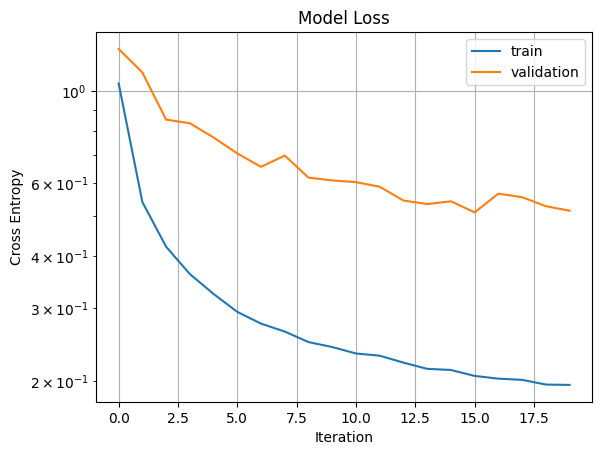

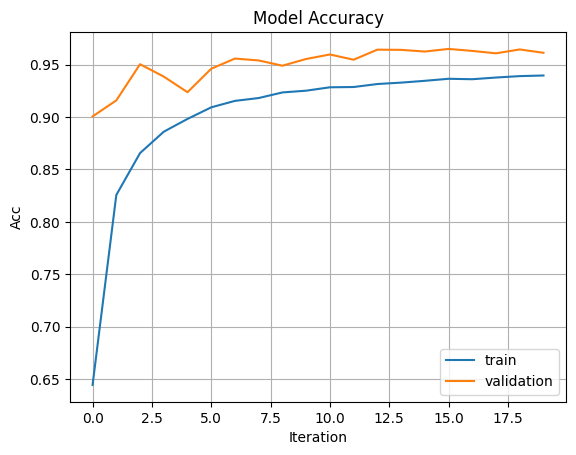

In [61]:
# vizualize mnist

for item in history.history:
    print("Key:",item)

plt.plot(history.history['loss'],label="train")
plt.plot(history.history['val_loss'],label="validation")
plt.title('Model Loss')
plt.yscale('log')
plt.ylabel('Cross Entropy')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()

#print("history",history.history)
plt.plot(history.history['sparse_categorical_accuracy'],label="train")
plt.plot(history.history['val_sparse_categorical_accuracy'],label="validation")
plt.title('Model Accuracy')
#plt.yscale('log')
plt.ylabel('Acc')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()

## 5.

Esant persimokymui papildykite modelius Dropout sluoksniais.

Ats.:
Neatrodo, kad yra persimokymas. Atrodo, kad kažkas atvirkčia persimokymo vyksta, stipriai pakėlus "Dropout" validacijos tikslumas yra ženkliai aukštesnis negu mokymosi. Kodėl?

Kas dar vyksta didinant "Dropout" tai maksimalus mokymosi tikslumas žemėja šiek tiek.

## 6.

Palyginkite Lab24 MNIST ir architektūros su konvoliuciniais sluoksniais tikslumą bei mokymosi greitį MNIST duomenims.

Ats.: Mokymosi laikas ženkliai pailgėja, bet dėsningumus ir sąryšius kuriuos mokymose proceses gali išmokti atstoją ilgesnį mokymasi.

Jeigu reikia greičio gali naudoti "Batching", kad pagreitinti mokymasi.

# Lab32

## 1.

Realizuoti LeNet architektūrą ir pritaikyti MNIST duomenims.

In [58]:
mnist = tf.keras.datasets.mnist
(train_images0, train_labels0), (test_images0, test_labels0) = mnist.load_data()

test_images=test_images0
train_images=train_images0

test_images  = test_images/255.0
train_images = train_images/255.0

keras_model = tf.keras.models.Sequential([
    layers.ZeroPadding2D(padding=(2,2), input_shape=(28, 28, 1)),
    layers.Conv2D(6, (5, 5), activation='relu'),
    layers.AveragePooling2D((2, 2), strides = 2),
    layers.Conv2D(16, (5, 5)),
    layers.AveragePooling2D((2, 2), strides = 2),

    layers.Flatten(),
    layers.Dense(120, activation='sigmoid'),
    layers.Dense(84, activation='sigmoid'),
    layers.Dense(10, activation='sigmoid')
])

keras_model.build(input_shape=[None,784])

keras_model.summary()

keras_model.compile(
    optimizer=tf.keras.optimizers.SGD(0.02),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

# Train loop
history = keras_model.fit(
    train_images,
    train_labels0,
    batch_size=100,
    epochs=20,
    validation_data=(test_images, test_labels0),
)


Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_8 (ZeroPadd  (None, 32, 32, 1)         0         
 ing2D)                                                          
                                                                 
 conv2d_75 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_16 (Aver  (None, 14, 14, 6)         0         
 agePooling2D)                                                   
                                                                 
 conv2d_76 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_17 (Aver  (None, 5, 5, 16)          0         
 agePooling2D)                                                   
                                                     

f:\KTU\Neuroninių tinklų metodai\venv\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


600/600 [==============================] - 3s 4ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1172 - val_loss: 2.2874 - val_sparse_categorical_accuracy: 0.1135
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 2.1563 - sparse_categorical_accuracy: 0.3599 - val_loss: 1.7558 - val_sparse_categorical_accuracy: 0.6306
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 1.2294 - sparse_categorical_accuracy: 0.7310 - val_loss: 0.8575 - val_sparse_categorical_accuracy: 0.8134
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.7044 - sparse_categorical_accuracy: 0.8393 - val_loss: 0.5652 - val_sparse_categorical_accuracy: 0.8741
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.5064 - sparse_categorical_accuracy: 0.8783 - val_loss: 0.4372 - val_sparse_categorical_accuracy: 0.8958
Epoch 6/20
600/600 [==============================] - 3s 4ms/step - loss: 0.4106 - sparse_categorical_accuracy:

Key: loss
Key: sparse_categorical_accuracy
Key: val_loss
Key: val_sparse_categorical_accuracy


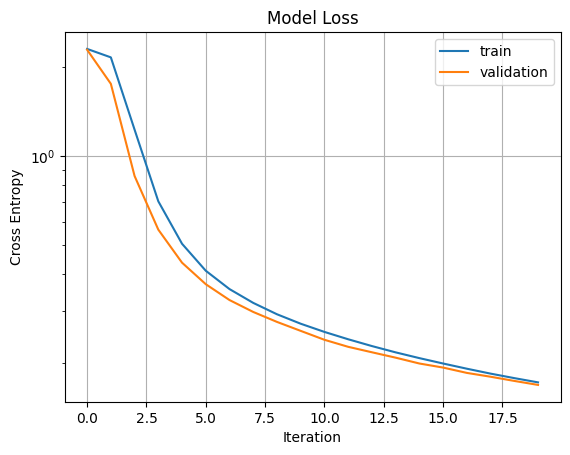

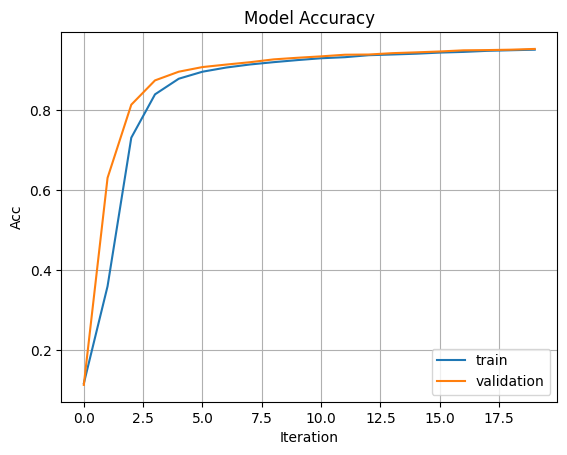

In [59]:
# vizualize mnist

for item in history.history:
    print("Key:",item)

plt.plot(history.history['loss'],label="train")
plt.plot(history.history['val_loss'],label="validation")
plt.title('Model Loss')
plt.yscale('log')
plt.ylabel('Cross Entropy')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()

#print("history",history.history)
plt.plot(history.history['sparse_categorical_accuracy'],label="train")
plt.plot(history.history['val_sparse_categorical_accuracy'],label="validation")
plt.title('Model Accuracy')
#plt.yscale('log')
plt.ylabel('Acc')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()

## 2.

Realizuoti ResNet tinklą ir palyginti su konvoliuciniu tinklu be liekamųjų ryšių.

In [84]:
from tensorflow.keras import datasets, layers, models, losses, Model

mnist = tf.keras.datasets.mnist

(train_images0, train_labels0),(test_images0,test_labels0) = datasets.mnist.load_data()
train_images0 = tf.pad(train_images0, [[0, 0], [2,2], [2,2]])/255
test_images0 = tf.pad(test_images0, [[0, 0], [2,2], [2,2]])/255
train_images0 = tf.expand_dims(train_images0, axis=3, name=None)
test_images0 = tf.expand_dims(test_images0, axis=3, name=None)
train_images0 = tf.repeat(train_images0, 3, axis=3)
test_images0 = tf.repeat(test_images0, 3, axis=3)

test_images  = test_images0
train_images = train_images0

base_model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False, input_shape = (32,32,3))

for layer in base_model.layers:
  layer.trainable = False

x = layers.Flatten()(base_model.output)
x = layers.Dense(1000, activation='relu')(x)
predictions = layers.Dense(10, activation = 'softmax')(x)

head_model = Model(inputs = base_model.input, outputs = predictions)
head_model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

history = head_model.fit(train_images, train_labels0, batch_size=256, epochs=10, validation_data=(test_images, test_labels0))



Epoch 1/10
235/235 [==============================] - 74s 306ms/step - loss: 0.7743 - accuracy: 0.7702 - val_loss: 0.4372 - val_accuracy: 0.8668
Epoch 2/10
235/235 [==============================] - 72s 308ms/step - loss: 0.3905 - accuracy: 0.8771 - val_loss: 0.3402 - val_accuracy: 0.8938
Epoch 3/10
235/235 [==============================] - 71s 302ms/step - loss: 0.3226 - accuracy: 0.8979 - val_loss: 0.2689 - val_accuracy: 0.9129
Epoch 4/10
235/235 [==============================] - 74s 317ms/step - loss: 0.2788 - accuracy: 0.9112 - val_loss: 0.2699 - val_accuracy: 0.9119
Epoch 5/10
235/235 [==============================] - 70s 299ms/step - loss: 0.2666 - accuracy: 0.9151 - val_loss: 0.2245 - val_accuracy: 0.9277
Epoch 6/10
235/235 [==============================] - 70s 300ms/step - loss: 0.2364 - accuracy: 0.9244 - val_loss: 0.2107 - val_accuracy: 0.9305
Epoch 7/10
235/235 [==============================] - 70s 299ms/step - loss: 0.2248 - accuracy: 0.9284 - val_loss: 0.2309 - val_ac

Key: loss
Key: accuracy
Key: val_loss
Key: val_accuracy


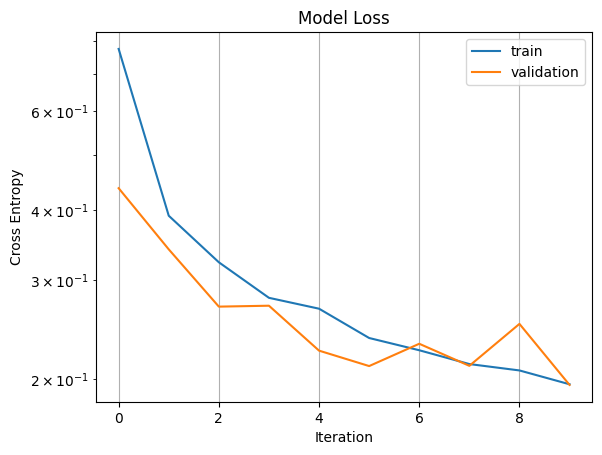

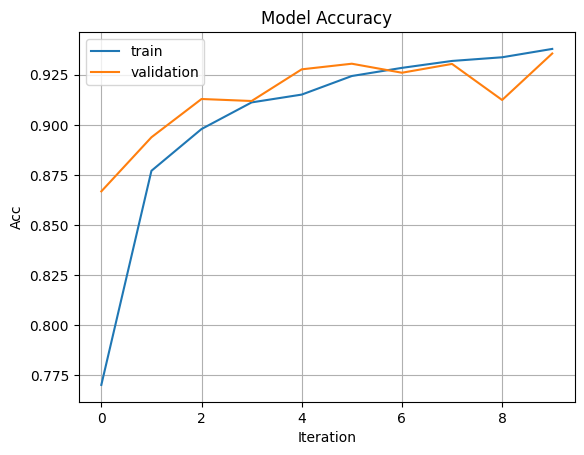

In [89]:
# vizualize mnist

for item in history.history:
    print("Key:",item)

plt.plot(history.history['loss'],label="train")
plt.plot(history.history['val_loss'],label="validation")
plt.title('Model Loss')
plt.yscale('log')
plt.ylabel('Cross Entropy')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()

#print("history",history.history)
plt.plot(history.history['accuracy'],label="train")
plt.plot(history.history['val_accuracy'],label="validation")
plt.title('Model Accuracy')
#plt.yscale('log')
plt.ylabel('Acc')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()

## 3.

Realizuoti U-Net tinklą.

In [100]:
#https://www.tensorflow.org/tutorials/images/segmentation

import pix2pix

(train_images0, train_labels0),(test_images0,test_labels0) = datasets.mnist.load_data()
train_images0 = tf.pad(train_images0, [[0, 0], [2,2], [2,2]])/255
test_images0 = tf.pad(test_images0, [[0, 0], [2,2], [2,2]])/255
train_images0 = tf.expand_dims(train_images0, axis=3, name=None)
test_images0 = tf.expand_dims(test_images0, axis=3, name=None)
train_images0 = tf.repeat(train_images0, 3, axis=3)
test_images0 = tf.repeat(test_images0, 3, axis=3)

test_images  = test_images0
train_images = train_images0

base_model = tf.keras.applications.MobileNetV2(input_shape=[32, 32, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)

down_stack.trainable = False

up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

def unet_model(output_channels:int):
  inputs = tf.keras.layers.Input(shape=[32, 32, 3])

  # Downsampling through the model
  skips = down_stack(inputs)
  x = skips[-1]
  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    concat = tf.keras.layers.Concatenate()
    x = concat([x, skip])

  x = layers.Flatten()(x)
  x = layers.Dense(128, activation='relu')(x)
  x = layers.Dense(10, activation = 'softmax')(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

model = unet_model(output_channels=10)
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy']
)

#tf.keras.utils.plot_model(model, show_shapes=True)

model_history = model.fit(
  train_images, train_labels0,
  epochs=20,
  batch_size=64,
  validation_data=(test_images, test_labels0)
)

Epoch 1/20
101/938 [==>...........................] - ETA: 3:20 - loss: 12.1178 - accuracy: 0.5198

KeyboardInterrupt: 